#### The logarithm

##### And its use for data science


Often we find that a transformation is applied to data expressed via the natural logarithm ($ln = 2,718...$), $log_2$, $log_{10}$. 

If encountered in a formula like so 

$$ RMSE_{log} = \sqrt{\frac{1}{N} \cdot \sum_{i = 1}^{N} (log (y_{pred}) - log (y_{true}))^2},$$

it is fair to assume the base $2$, although for theoretical purposes this can be neglected. 


**The question can be phrased like this**: 

What does the transformation with the logarithm do to the scale of values?



Random prediction error: 24763.00


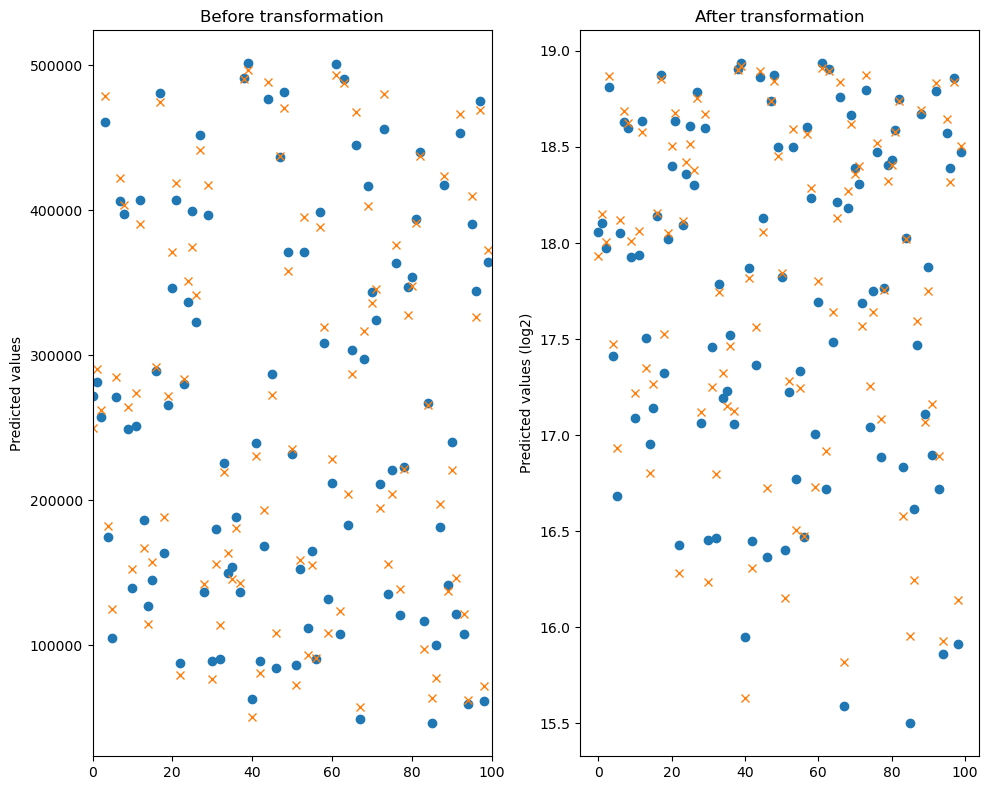

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# For this scenario, imagine we were predicting house prices

# create one array with target values
target_values = np.random.randint(50000, 500000, 100)

# create prediction values
pred_values = target_values + np.random.randint(-25000, 25000, 100)

# picking a random index
rand_index = np.random.randint(0, 101)
print(f"Random prediction error: {target_values[rand_index] - pred_values[rand_index]:.2f}")

# plotting the data
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# First subplot
axs[0].plot(range(len(pred_values)), pred_values, 'o')
axs[0].plot(range(len(target_values)), target_values, 'x')
axs[0].set_xlim(0, 100)
#axs[0].set_ylim(0, 600000)
axs[0].set_xlabel('')
axs[0].set_ylabel('Predicted values')
axs[0].set_title('Before transformation')

# Second subplot
axs[1].plot(range(len(pred_values)), np.log2(pred_values), 'o')
axs[1].plot(range(len(target_values)), np.log2(target_values), 'x')
axs[1].set_xlabel('')
axs[1].set_ylabel('Predicted values (log2)')
axs[1].set_title('After transformation')

plt.tight_layout()
plt.show()

**Explanation:**

In essence, the logarithm is used to normalize differences between high and low values. Without this transformation, expensive houses would dominate the error calculation due to their larger absolute values. For instance, an error of $10,000 for a high-priced house is relatively insignificant, but the same error for a low-priced house is much more impactful.

By applying the logarithm, the evaluation focuses on relative errors rather than absolute ones. This means that a 10% error for an expensive house and a 10% error for a cheaper house are treated equally, regardless of the actual price difference between them. The use of logarithms ensures that the model gives similar attention to both high-end and low-end properties.

In practical terms, calculating the RMSE between the logarithms of predicted and actual prices ensures that errors across different price ranges are comparable. Without this adjustment, models might prioritize minimizing errors for expensive houses while performing poorly on cheaper ones. The logarithmic transformation balances the influence of each house, making sure that the model performs well across the entire price spectrum.

Thus, the goal is to ensure that the predictions are consistently well for both expensive and affordable homes, without letting one category dominate the evaluation process.








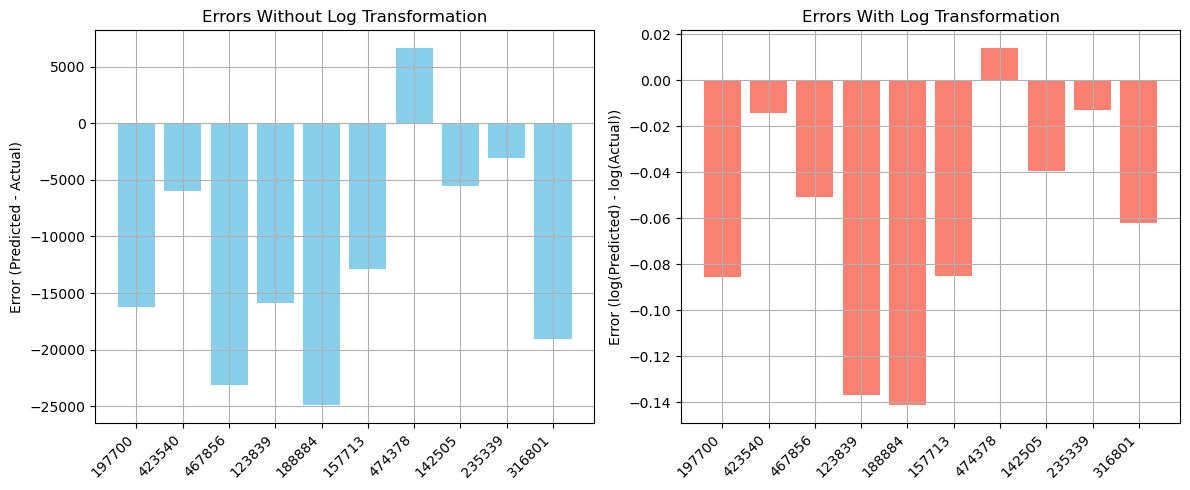

In [2]:
# here is another visualization considering few samples

# Calculate the errors before and after applying logarithmic transformation
errors_before = pred_values - target_values
errors_after = np.log(pred_values) - np.log(target_values) # uses ln

# select 10 arbitrary samples
choices = np.random.randint(0, 100, 10)
errors_after = errors_after[choices]
errors_before = errors_before[choices]

# Plot the original vs. transformed errors
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Errors without logarithmic transformation
ax[0].bar(np.arange(len(errors_after)), errors_before, color='skyblue')
#ax[0].bar(np.arange(len(errors_after)), target_values[choices], color='salmon', alpha=0.5)
ax[0].set_title('Errors Without Log Transformation')
ax[0].set_xlabel('')
ax[0].set_ylabel('Error (Predicted - Actual)')
ax[0].set_xticks(np.arange(len(errors_after)))
ax[0].set_xticklabels(target_values[choices].astype(str), rotation=45, ha='right')
ax[0].grid(True)

# Plot 2: Errors with logarithmic transformation
ax[1].bar(np.arange(len(errors_after)), errors_after, color='salmon')
ax[1].set_title('Errors With Log Transformation')
ax[1].set_xlabel('')
ax[1].set_ylabel('Error (log(Predicted) - log(Actual))')
ax[1].set_xticks(np.arange(len(errors_after)))
ax[1].set_xticklabels(target_values[choices].astype(str), rotation=45, ha='right')
ax[1].grid(True)

plt.tight_layout()
plt.show()